<a href="https://colab.research.google.com/github/vyakhyaagoyal/aiml-_colab-_sem-4/blob/main/EDA_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
#load the file
#read the contents of the file
df=pd.read_csv('/content/titanic.csv')

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df.shape[1]

12

In [ ]:
df.columns
df.columns[3:6]

Index(['Name', 'Gender', 'Age'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df["Age"].head(10)
# () used for calling function/expressions/conditions
# [] for accessing data frames/series/columns and indexing
# {} used for dictionary

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [ ]:
missing_count=df.isna()
print(missing_count)

     PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  \
0          False     False   False  False   False  False  False  False   
1          False     False   False  False   False  False  False  False   
2          False     False   False  False   False  False  False  False   
3          False     False   False  False   False  False  False  False   
4          False     False   False  False   False  False  False  False   
..           ...       ...     ...    ...     ...    ...    ...    ...   
886        False     False   False  False   False  False  False  False   
887        False     False   False  False   False  False  False  False   
888        False     False   False  False   False   True  False  False   
889        False     False   False  False   False  False  False  False   
890        False     False   False  False   False  False  False  False   

     Ticket   Fare  Cabin  Embarked  
0     False  False   True     False  
1     False  False  False     False

In [ ]:
missing_count=df.isna().sum()
print(missing_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df["Survived"].value_counts(normalize=True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


In [ ]:
df["Age"].head(8)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0


<Axes: xlabel='Survived'>

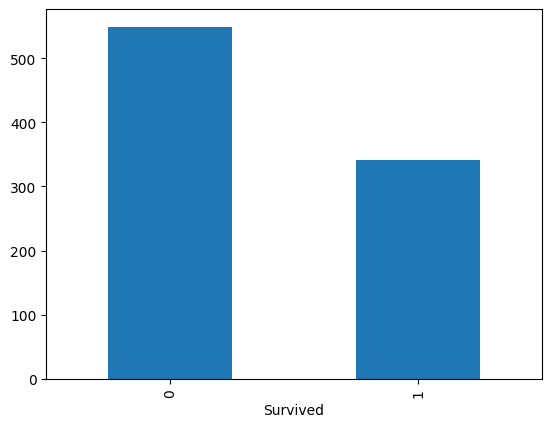

In [ ]:
df["Survived"].value_counts().plot(kind="bar")

In [ ]:
df["Age"].isna()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,True
889,False


In [ ]:
df["Age"].isna().sum()

np.int64(177)

In [ ]:
grouped=df.groupby("Gender")

In [ ]:
print(grouped.groups.keys())

dict_keys(['female', 'male'])


In [ ]:
print(grouped.get_group("female").head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name  Gender   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


In [ ]:
grouped.size()

,0
Gender,
female,314
male,577


In [ ]:
total=df["Gender"].value_counts()
print(total)

Gender
male      577
female    314
Name: count, dtype: int64


In [ ]:
survived=grouped["Survived"].sum()

In [ ]:
print(survived)

Gender
female    233
male      109
Name: Survived, dtype: int64


In [ ]:
rate=(survived/total)*100
print(rate)

Gender
female    74.203822
male      18.890815
dtype: float64


In [ ]:
df1=df.copy()
df1.head()
print("Missing age before:",df1["Age"].isna().sum())

Missing age before: 177


In [ ]:
print("Missing % before:",(df1["Age"].isna().mean()*100).round(2))

Missing % before: 19.87


In [ ]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean())
print("Missing age after:", df1["Age"].isna().sum())

Missing age after: 0


In [ ]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df2=df.copy()
df2.head()
print("Missing age before:",df2["Age"].isna().sum())
print("Missing % before:",(df2["Age"].isna().mean()*100).round(2))
num_imputer=SimpleImputer(strategy="median")
#learn median from age
num_imputer.fit(df2[['Age']])
print(num_imputer.statistics_)
#fill missing using learned median
df2['Age']=num_imputer.transform(df2[['Age']])
num_imputer.fit(df2[['Age']])
print("Missing % after:", (df2["Age"].isna().mean()*100).round(2))

Missing age before: 177
Missing % before: 19.87
[28.]
Missing % after: 0.0


In [ ]:
num_imputer=SimpleImputer(strategy='median')
df2['Age']=num_imputer.fit_transform(df2[['Age']])
print("Missing % after:", (df2["Age"].isna().mean()*100).round(2))

Missing % after: 0.0


In [ ]:
df['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C
